Epoch 1/1000, Error: [0.68987913]
Epoch 101/1000, Error: [0.48487273]
Epoch 201/1000, Error: [0.48163883]
Epoch 301/1000, Error: [0.48042043]
Epoch 401/1000, Error: [0.47976817]
Epoch 501/1000, Error: [0.47935809]
Epoch 601/1000, Error: [0.47907494]
Epoch 701/1000, Error: [0.47886698]
Epoch 801/1000, Error: [0.4787074]
Epoch 901/1000, Error: [0.47858084]
Epoch 1/1000, Error: [1.02248343]
Epoch 101/1000, Error: [0.48485438]
Epoch 201/1000, Error: [0.48163675]
Epoch 301/1000, Error: [0.4804209]
Epoch 401/1000, Error: [0.47976926]
Epoch 501/1000, Error: [0.47935932]
Epoch 601/1000, Error: [0.47907617]
Epoch 701/1000, Error: [0.47886815]
Epoch 801/1000, Error: [0.47870849]
Epoch 901/1000, Error: [0.47858187]


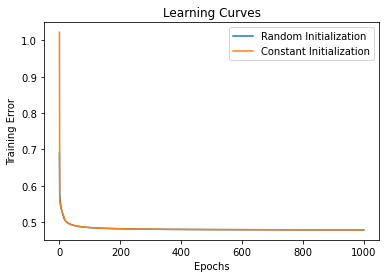

In [2]:
'''

NEURAL NETWORK WITH STOCHASTIC BACK-PROPAGATION
Input layer size and hidden layer size are variable/can be adjusted
Learning rate is variable/can be adjusted

In this example, I am testing the output from initializing the weights of the network randomly

Sigmoid function: f(x) = 1.716 tanh(2/3 x)

'''


import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1.716 * np.tanh(2/3 * x)

# Derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return 1.716 * (2/3) * (1 - np.tanh(2/3 * x)**2)

# Initialize weights randomly or with constants
def initialize_weights_random(input_size, hidden_size, output_size):
    w_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    w_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    return w_input_hidden, w_hidden_output

def initialize_weights_constant(input_size, hidden_size, output_size):
    w_input_hidden = np.full((input_size, hidden_size), 0.5)
    w_hidden_output = np.full((hidden_size, output_size), -0.5)
    return w_input_hidden, w_hidden_output

# Stochastic backpropagation
def backpropagation(X, y, w_input_hidden, w_hidden_output, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            # Forward pass
            hidden_input = np.dot(X[i], w_input_hidden)
            hidden_output = sigmoid(hidden_input)
            output = sigmoid(np.dot(hidden_output, w_hidden_output))
            
            # Backward pass
            output_error = y[i] - output
            total_error += np.abs(output_error)
            output_delta = output_error * sigmoid_derivative(output)
            hidden_error = np.dot(output_delta, w_hidden_output.T)
            hidden_delta = hidden_error * sigmoid_derivative(hidden_input)
            
            # Weight updates
            w_hidden_output += learning_rate * np.outer(hidden_output, output_delta)
            w_input_hidden += learning_rate * np.outer(X[i], hidden_delta)
            
        errors.append(total_error / len(X))
        if epoch % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Error: {total_error / len(X)}")
    return errors

# Define training data (this was provided in my assignment)
X = np.array([[1.58, 2.32, -5.8], [0.67, 1.58, -4.78], [1.04, 1.01, -3.63], [-1.49, 2.18, -3.39], [-0.41, 1.21, -4.73], [1.39, 3.16, 2.87], [1.20, 1.40, -1.89], [-0.92, 1.44, -3.22], [0.45, 1.33, -4.38], [-0.76, 0.84, -1.96], 
              [0.21, 0.03, -2.21], [0.37, 0.28, -1.8], [0.18, 1.22, 0.16], [-0.24, 0.93, -1.01], [-1.18, 0.39, -0.39], [0.74, 0.96, -1.16], [-0.38, 1.94, -0.48], [0.02, 0.72, -0.17], [0.44, 1.31, -0.14], [0.46, 1.49, 0.68]])
y = np.array([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2]])

# Define network architecture
input_size = 3
hidden_size = 1
output_size = 1

# Parameters
learning_rate = 0.1
epochs = 1000

# Initialize weights randomly
w_input_hidden, w_hidden_output = initialize_weights_random(input_size, hidden_size, output_size)
errors_random = backpropagation(X, y, w_input_hidden, w_hidden_output, learning_rate, epochs)

# Initialize weights with constants
w_input_hidden, w_hidden_output = initialize_weights_constant(input_size, hidden_size, output_size)
errors_constant = backpropagation(X, y, w_input_hidden, w_hidden_output, learning_rate, epochs)

# Plot learning curves
plt.plot(range(epochs), errors_random, label='Random Initialization')
plt.plot(range(epochs), errors_constant, label='Constant Initialization')
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

'''
Although there is extremely little difference between the constant initialization and the random initialization, we can 
attribute this difference to the random weight initialization. The random weigh initialization allows the network to 
explore different parts of the weight space during training.
'''

In [ ]:
'''

NAIVE BAYESIAN CLASSIFIER: Functions: train, predict

'''

# Naive Baesian Classification


class NaiveBayesClassifier:
    #Initialize probability sets
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}
        
    def train(self, X, y):
        num_samples = len(X)
        num_features = len(X[0])
        
        # Calculate class probabilities
        for label in set(y):
            self.class_probabilities[label] = sum(1 for item in y if item == label) / num_samples
        
        # Calculate feature probabilities
        for feature_index in range(num_features):
            feature_values = [sample[feature_index] for sample in X]
            for label in set(y):
                label_indices = [i for i in range(num_samples) if y[i] == label]
                feature_given_label = [feature_values[i] for i in label_indices]
                count_feature_given_label = sum(1 for value in feature_given_label if value == 1)
                self.feature_probabilities[(feature_index, label)] = count_feature_given_label / len(label_indices)
                
    def predict(self, X):
        predictions = []
        for sample in X:
            max_prob = float('-inf')
            predicted_class = None
            for label in self.class_probabilities:
                class_prob = self.class_probabilities[label]
                feature_probs = [self.feature_probabilities.get((i, label), 0) if sample[i] == 1 else 1 - self.feature_probabilities.get((i, label), 0) for i in range(len(sample))]
                total_prob = class_prob * reduce(lambda x, y: x * y, feature_probs)
                if total_prob > max_prob:
                    max_prob = total_prob
                    predicted_class = label
            predictions.append(predicted_class)
        return predictions

    
classifier = NaiveBayesClassifier()
classifier.train(X_train, y_train)

predictions = classifier.predict(X_test)

print(
    "Accuracy of Naive Bayesian Classifier:\n"
    f"{metrics.accuracy_score(y_test, predictions)}\n"
)

In [ ]:
'''

KNN Classifier: Functions: train, predict
'k' is variable

'''

# Nearest Neighbors Classification

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for sample in X_test:
            distances = []
            for train_sample, train_label in zip(self.X_train, self.y_train):
                distance = np.linalg.norm(sample - train_sample)
                distances.append((train_label, distance))
            distances.sort(key=lambda x: x[1])
            k_nearest = distances[:self.k]
            k_nearest_labels = [label for label, _ in k_nearest]
            predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(predicted_label)
        return predictions


N_values = [1, 5, 10, 20, 50, 100]

train_errors = []
test_errors = []

for N in N_values:
    knn = KNNClassifier(k=N)
    knn.train(X_train, y_train)
    
    predictions_test = knn.predict(X_test)
    predictions_train = knn.predict(X_train)

    train_error = 1 - metrics.accuracy_score(y_train, predictions_train)
    train_errors.append(train_error)

    test_error = 1 - metrics.accuracy_score(y_test, predictions_test)
    test_errors.append(test_error)


    
plt.figure(figsize=(10, 6))
plt.plot(N_values, train_errors, marker='o', label='Training Error Rate')
plt.plot(N_values, test_errors, marker='o', label='Test Error Rate')
plt.title('KNN Classifier Accuracy as # of Neighbors Increase')
plt.xlabel('# of Neighbors')
plt.ylabel('Error Rate')
plt.xticks(N_values)
plt.legend()
plt.grid(True)
plt.show()
   